##Laboratory work 2

Find a solution to the Poisson equation in a periodically closed domain:
\begin{equation}
  \begin{cases}
    \Delta u = -32\cos(4x) - 25\sin(4x + 3y) \\
    u(x+\pi, y) = u(x, y) \\
    u(x, y+2\pi) = u(x, y) \\
    0 < x < \pi, 0 < y < 2\pi
  \end{cases}
\end{equation}

Exact solution:
\begin{equation}
  u_0(x, y) = 2\cos(4x) + \sin(4x+3y)
\end{equation}

In laboratory work, it is necessary to solve the problem using the method of minimal residuals, construct an exact solution, numerically solution and error.

Exstras:
*   Error depending on step
*   Error depending on iteration number



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# grid creating
h0 = 0.1
l_x = np.pi
l_y = np.pi * 2
nx = int(np.round(l_x / h0))
ny = int(np.round(l_y / h0))

hx = l_x / nx
hy = l_y / ny

x = np.linspace(0.5 * hx, l_x - 0.5 * hx, nx)
y = np.linspace(0.5 * hy, l_y - 0.5 * hy, ny)
X, Y = np.meshgrid(x, y, indexing = 'ij')

In [ ]:
# right side
def RHS(X, Y):
  res = 32 * np.cos(4*X) + 25 * np.sin(4*X + 3*Y)
  return res

# operator action
def OpL(u):
  res = np.zeros_like(u)
  res[+1:, :] += (u[+1:, :]- u[:-1, :]) / hx**2
  res[:-1, :] += (u[:-1, :]- u[+1:, :]) / hx**2
  res[:, +1:] += (u[:, +1:]- u[:, :-1]) / hy**2
  res[:, :-1] += (u[:, :-1]- u[:, +1:]) / hy**2

  res[0, :] += (u[0, :]- u[-1,:]) / hx**2
  res[-1,:] += (u[-1,:]- u[0, :]) / hx**2
  res[:, 0] += (u[:, 0]- u[:,-1]) / hy**2
  res[:,-1] += (u[:,-1]- u[:, 0]) / hy**2
  return res

# residual
def r_k(u, f):
    return OpL(u) - f

# method of minimal residuals
def solve_min_residual(nx, ny, X, Y, eps=1e-2, max_iter=1000):
    f = RHS(X, Y)
    u = np.zeros((nx, ny))
    rk = r_k(u, f)
    iter = 0

    while np.linalg.norm(rk) > eps and iter < max_iter:
        OpL_rk = OpL(rk)
        tau = np.sum(rk * OpL_rk) / np.sum(OpL_rk * OpL_rk)
        u -= tau * rk
        u -= u.mean()
        rk = r_k(u, f)
        iter += 1

    return u

def exact_solution(X, Y):
    res = 2 * np.cos(4 * X) + np.sin(4 * X + 3 * Y)
    return res

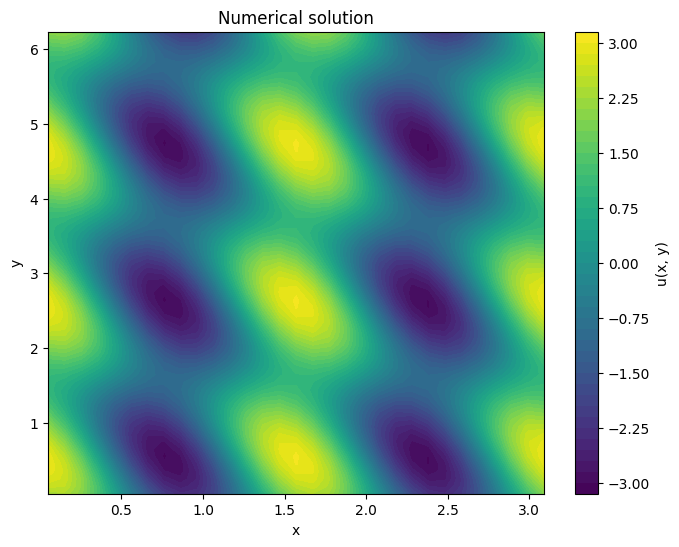

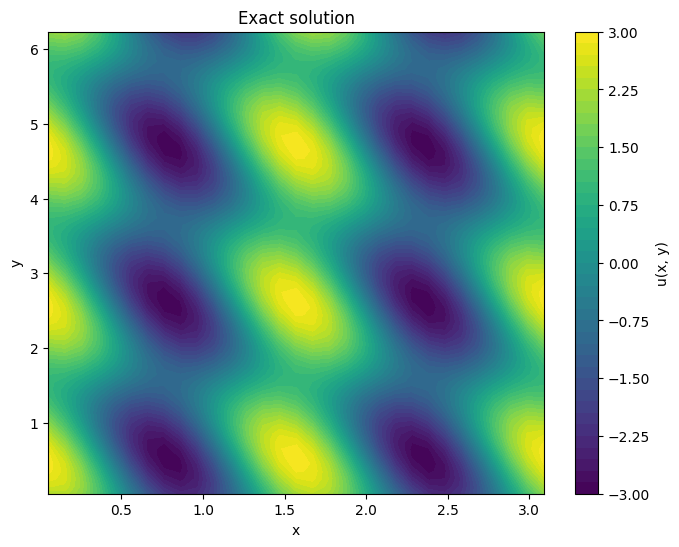

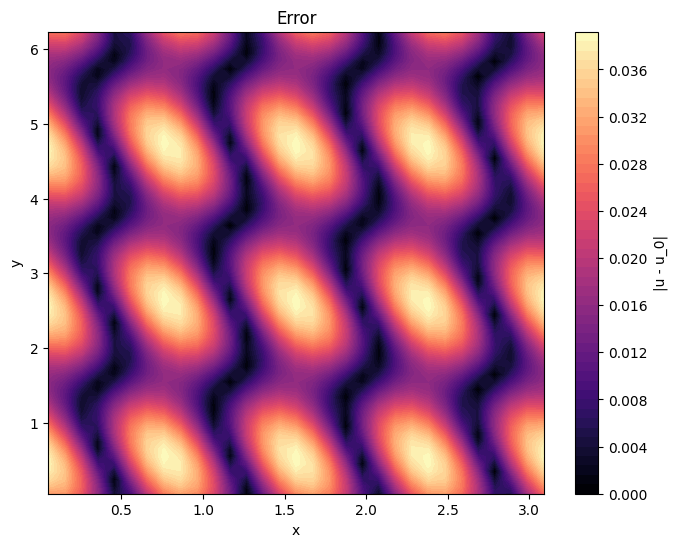

In [ ]:
u = solve_min_residual(nx, ny, X, Y)

u_0 = exact_solution(X, Y)

error = np.abs(u - u_0)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, u, levels=50, cmap='viridis')
plt.colorbar(label='u(x, y)')
plt.title('Numerical solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, u_0, levels=50, cmap='viridis')
plt.colorbar(label='u(x, y)')
plt.title('Exact solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, error, levels=50, cmap='magma')
plt.colorbar(label='|u - u_0|')
plt.title('Error')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

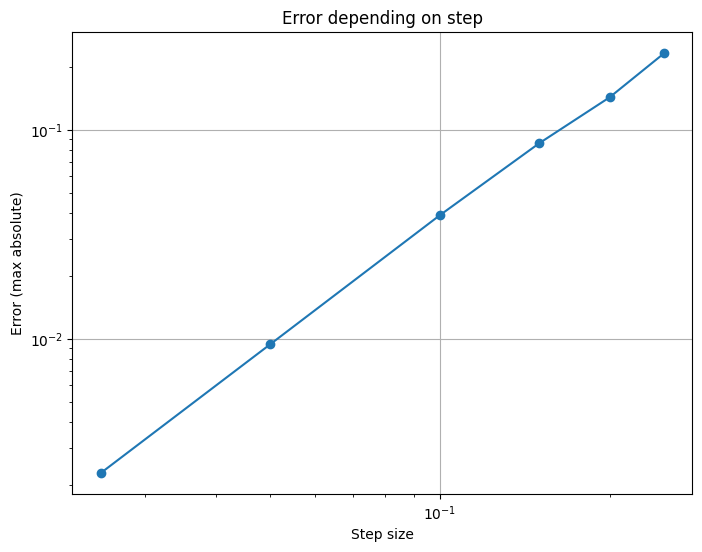

In [ ]:
# dependence of the error on the step

h_values = [0.25, 0.2, 0.15, 0.1, 0.05, 0.025]
errors = []

for h0 in h_values:
    nx = int(np.round(l_x / h0))
    ny = int(np.round(l_y / h0))
    hx = l_x / nx
    hy = l_y / ny
    x = np.linspace(0.5 * hx, l_x - 0.5 * hx, nx)
    y = np.linspace(0.5 * hy, l_y - 0.5 * hy, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')

    u = solve_min_residual(nx, ny, X, Y)

    u_0 = exact_solution(X, Y)

    error = np.max(np.abs(u - u_0))
    errors.append(error)

plt.figure(figsize=(8, 6))
plt.plot(h_values, errors, marker='o', linestyle='-')
plt.xlabel('Step size')
plt.ylabel('Error (max absolute)')
plt.xscale("log")
plt.yscale("log")
plt.title("Error depending on step")
plt.grid(True)
plt.show()

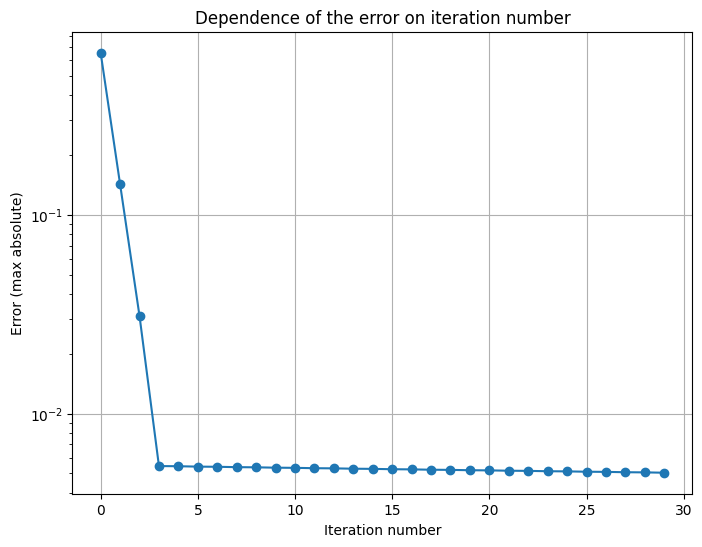

In [ ]:
# dependence of the error on the iteration number

def min_residual_error(nx, ny, X, Y, tol=1e-2, max_iter=30):
    f = RHS(X, Y)
    u = np.zeros((nx, ny))
    rk = r_k(u, f)
    iter = 0
    errors = []
    u_0 = exact_solution(X, Y)

    while np.linalg.norm(rk) > tol and iter < max_iter:
        OpL_rk = OpL(rk)
        tau = np.sum(rk * OpL_rk) / np.sum(OpL_rk * OpL_rk)
        u -= tau * rk
        rk = r_k(u, f)

        error = np.max(np.abs(u - u_0))
        errors.append(error)

        iter += 1

    return u, errors

h0 = 0.02
nx = int(np.round(l_x / h0))
ny = int(np.round(l_y / h0))
hx = l_x / nx
hy = l_y / ny
x = np.linspace(0.5 * hx, l_x - 0.5 * hx, nx)
y = np.linspace(0.5 * hy, l_y - 0.5 * hy, ny)
X, Y = np.meshgrid(x, y, indexing='ij')

u_solution, errors = min_residual_error(nx, ny, X, Y)

plt.figure(figsize=(8, 6))
plt.semilogy(range(len(errors)), errors, marker='o')
plt.xlabel('Iteration number')
plt.ylabel('Error (max absolute)')
plt.title('Dependence of the error on iteration number')
plt.grid(True)
plt.show()